### NAME                          :- KUCHARLAPATI NAVODAYA VARMA
### MAIL                            :- kv3121@srmist.edu.in
### GITHUB                       :- https://github.com/Navodayavarmak

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## About dataset :-

This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

                     *Field*	                                 *Description*
                   Loan_status	                    Whether a loan is paid off on in collection
                   Principal	                    Basic principal loan amount at the
                   Terms                        	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
                   Effective_date	                When the loan got originated and took effects
                   Due_date	                        Since it’s one-time payoff schedule, each loan has one single due date
                   Age	                            Age of applicant
                   Education	                    Education of applicant
                   Gender	                        The gender of applicant
 
 Lets download the dataset

In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-09-21 08:04:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-09-21 08:04:37 (161 MB/s) - ‘loan_train.csv’ saved [23101/23101]




## Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df.shape

(346, 10)


## Convert to date time object


In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male



## Data visualization and pre-processing


In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [9]:

!conda install -c anaconda seaborn -y


Solving environment: done

# All requested packages already installed.



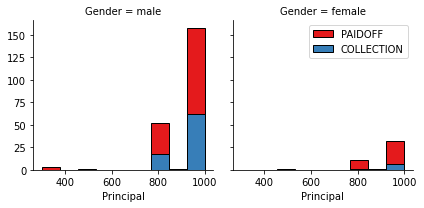

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

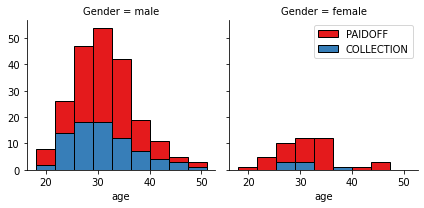

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-processing: Feature selection/extraction

       Lets look at the day of the week people get the loan
       

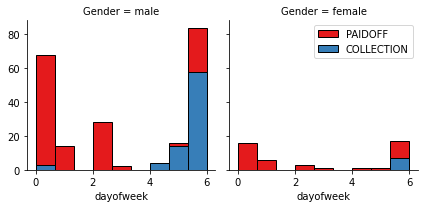

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

     Lets look at gender:
     

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

Lets convert male to 0 and female to 1:

In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

     How about education?
     

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64


Feature befor One Hot Encoding


In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college



Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Feature selection
      
     Lets defind feature sets, X: 
     

In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [21]:
  # OUR LABLES
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [22]:
y = np.array(pd.get_dummies(df['loan_status'].values, drop_first=True))
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)


## Normalize Data

           Data Standardization give data zero mean and unit variance (technically should be done after train test split )
           

In [23]:
sc_X = preprocessing.StandardScaler()
X = sc_X.fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])


## Classification


## K Nearest Neighbor(KNN)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=0)

K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
from sklearn.metrics import confusion_matrix
for n in range(1,K):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_tr,y_tr) 
    yhat  = neigh.predict(x_ts) 
    cm = confusion_matrix(y_ts, yhat)
    mean_acc[n-1] = (cm[0,0]+cm[1,1]) / cm.sum()
    std_acc[n-1] = np.std(yhat==y_ts)/np.sqrt(yhat.shape[0])

<ipython-input-25-c7f5d90d820f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors=n).fit(x_tr,y_tr)
<ipython-input-25-c7f5d90d820f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors=n).fit(x_tr,y_tr)
<ipython-input-25-c7f5d90d820f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors=n).fit(x_tr,y_tr)
<ipython-input-25-c7f5d90d820f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors=n).fit(x_t

In [26]:
print("Best K is " + str(mean_acc.argmax()+1))

Best K is 7


In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)

In [28]:
knn_classifier.fit(X, y)

<ipython-input-28-d9e0bf720b81>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_classifier.fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [29]:
# Testing through the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, knn_classifier.predict(X))
print("KNN classifier train accuracy is: " + str((cm[0,0]+cm[1,1]) / cm.sum()))
cm

KNN classifier train accuracy is: 0.8092485549132948


array([[ 39,  47],
       [ 19, 241]])


## Decision Tree


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
tree_classifier = DecisionTreeClassifier()

In [32]:
tree_classifier.fit(X,y)

DecisionTreeClassifier()

In [33]:
# Testing through the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, tree_classifier.predict(X))
print("Descision tree classifier train accuracy is: " + str((cm[0,0]+cm[1,1]) / cm.sum()))
cm

Descision tree classifier train accuracy is: 0.8930635838150289


array([[ 75,  11],
       [ 26, 234]])


##  Support Vector Machine


In [34]:
from sklearn.svm import SVC


In [35]:
svm_classifier = SVC(kernel='rbf')

In [36]:
svm_classifier.fit(X,y)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [37]:
# Testing through the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, svm_classifier.predict(X))
print("SVM classifier train accuracy is: " + str((cm[0,0]+cm[1,1]) / cm.sum()))
cm

SVM classifier train accuracy is: 0.7601156069364162


array([[  3,  83],
       [  0, 260]])


##  Logistic Regression


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:

logistic_classifier = LogisticRegression()

In [40]:
logistic_classifier.fit(X,y)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [41]:
# Testing through the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, logistic_classifier.predict(X))
print("Logistic Regression train classifier accuracy is: " + str((cm[0,0]+cm[1,1]) / cm.sum()))
cm

Logistic Regression train classifier accuracy is: 0.7543352601156069


array([[ 11,  75],
       [ 10, 250]])


## Model Evaluation using Test set


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [43]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-09-21 08:39:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-09-21 08:39:43 (86.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



 
 ## Load Test set for evaluation
 

In [44]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [45]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [46]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1
5,37,37,PAIDOFF,700,15,2016-09-11,2016-09-25,33,High School or Below,male,6,1
6,38,38,PAIDOFF,1000,15,2016-09-11,2016-09-25,24,college,male,6,1
7,48,48,PAIDOFF,1000,30,2016-09-11,2016-10-10,32,Bechalor,male,6,1
8,50,50,PAIDOFF,800,15,2016-09-11,2016-09-25,27,college,female,6,1
9,61,61,PAIDOFF,1000,15,2016-09-11,2016-09-25,37,college,male,6,1


In [47]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [48]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [49]:
X_test = test_Feature
X_test[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [50]:

y_test = np.array(pd.get_dummies(test_df['loan_status'].values, drop_first=True))
y_test[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [51]:
X_test = sc_X.fit(X_test).transform(X_test)
X_test[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])


## Test set evaluation time!

             First lets evaluate the accuracy score based on the accuracy_score metric (confusion matrix)


In [52]:
# KNN Classifier
cm = confusion_matrix(y_test, knn_classifier.predict(X_test))
print("KNN classifier test accuracy is: " + str((cm[0,0]+cm[1,1]) / cm.sum()))

print("\n")

# Decision Tree Classifier
cm = confusion_matrix(y_test, tree_classifier.predict(X_test))
print("Decision Tree classifier test accuracy is: " + str((cm[0,0]+cm[1,1]) / cm.sum()))

print("\n")

# SVM Classifier
cm = confusion_matrix(y_test, svm_classifier.predict(X_test))
print("SVM classifier test accuracy is: " + str((cm[0,0]+cm[1,1]) / cm.sum()))

print("\n")

# Logistic Regression Classifer
cm = confusion_matrix(y_test, logistic_classifier.predict(X_test))
print("Logistic Regression classifier test accuracy is: " + str((cm[0,0]+cm[1,1]) / cm.sum()))

KNN classifier test accuracy is: 0.7222222222222222


Decision Tree classifier test accuracy is: 0.6851851851851852


SVM classifier test accuracy is: 0.7222222222222222


Logistic Regression classifier test accuracy is: 0.7592592592592593


 Now lets use Jaccard, F1-Score and LogLoss for evaluation

In [54]:
# Compute the Jaccard-Similarity-Score of each classifier
knn_jac = jaccard_score(y_test, knn_classifier.predict(X_test))
dt_jac = jaccard_score(y_test, tree_classifier.predict(X_test))
svm_jac = jaccard_score(y_test, svm_classifier.predict(X_test))
lr_jac = jaccard_score(y_test, logistic_classifier.predict(X_test))
# Compute the f1_score of each classifier
knn_f1 = f1_score(y_test, knn_classifier.predict(X_test))
dt_f1 = f1_score(y_test, tree_classifier.predict(X_test))
svm_f1 = f1_score(y_test, svm_classifier.predict(X_test))
lr_f1 = f1_score(y_test, logistic_classifier.predict(X_test))
# Compute the log_loss of each classifier
# knn_log = log_loss(y_test, knn_classifier.predict(X_test))
# dt_log = log_loss(y_test, tree_classifier.predict(X_test))
# svm_log = log_loss(y_test, svm_classifier.predict(X_test))
lr_log = log_loss(y_test, logistic_classifier.predict(X_test))

In [55]:
data = np.zeros((4,3), dtype=float)
data[0,0] = (knn_jac)
data[0,1] = (knn_f1)
data[0,2] = 0
data[1,0] = (dt_jac)
data[1,1] = (dt_f1)
data[1,2] = 0
data[2,0] = (svm_jac)
data[2,1] = (svm_f1)
data[2,2] = 0
data[3,0] = (lr_jac)
data[3,1] = (lr_f1)
data[3,2] = (lr_log)
report = pd.DataFrame(data = data)
report['Algorithms'] = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
report = pd.DataFrame(np.append(np.expand_dims(report.iloc[:,3], 1), report.iloc[:,0:3], axis=1), 
                      columns = ['Algorithms', 'Jaccard', 'F1-Score', 'LogLoss'])
report['LogLoss'] = ['NA','NA','NA',report.iloc[3,3]]

In [56]:

report

,Algorithms,Jaccard,F1-Score,LogLoss
0,KNN,0.7,0.823529,NA
1,Decision Tree,0.645833,0.78481,NA
2,SVM,0.722222,0.83871,NA
3,Logistic Regression,0.754717,0.860215,8.315083


#### THANK YOU